### Könyvtárak importálása

In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import os
ldir = os.chdir(r'C:\Users\Gergely\Documents\Datasets')

### Salary dataset beolvasása

In [2]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.shape

(30, 2)

### Regresszió seaborn és scipy

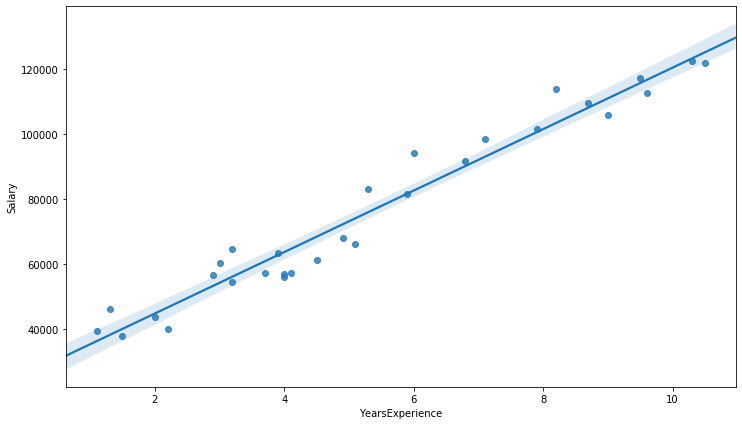

In [4]:
plt.figure(figsize=(12, 7))
sns.regplot(x=df['YearsExperience'], y=df['Salary'])

In [5]:
stats.linregress(df['YearsExperience'], df['Salary'])

LinregressResult(slope=9449.962321455077, intercept=25792.20019866869, rvalue=0.9782416184887599, pvalue=1.1430681092271558e-20, stderr=378.7545742388215)

###   
### Gradient descent

#### B0 és B1 Kezdőértékei, hiba nagysága

Összes hiba:  195088658122.0


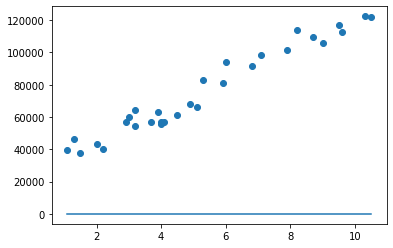

In [6]:
B0 = 0
B1 = 0

def y_kalap(b0, b1, x):
    return np.array(b0 + np.array(x)*b1)

y_ = y_kalap(B0, B1, df['YearsExperience'])

plt.scatter(df['YearsExperience'], df['Salary'])
plt.plot(df['YearsExperience'], y_)

hiba = np.sum((np.array(y_) - np.array(df['Salary']))**2)
print('Összes hiba: ', hiba)

#### Gradient descent függvény írása

In [7]:
def gradient_descent_ciklushoz(b0, b1, x, y, alpha):    
    db0 = np.sum(y_kalap(b0, b1, x) - np.array(y))                #y_ - y      = hiba
    db1 = np.sum((y_kalap(b0, b1, x) - np.array(y))*np.array(x))  #(y_ - y)*X  = hiba*X
    
    b0 -= db0*alpha
    b1 -= db1*alpha
    
    y_ = y_kalap(b0, b1, x)
    hiba = np.sum((np.array(y_) - np.array(y))**2)
    
    return b0, b1, y_, hiba

#### Gradient descent függvény futtatása ciklusban

B0:  25792.129668393747
B1:  9449.972787852597
Átlag hiba:  1020.962809041158


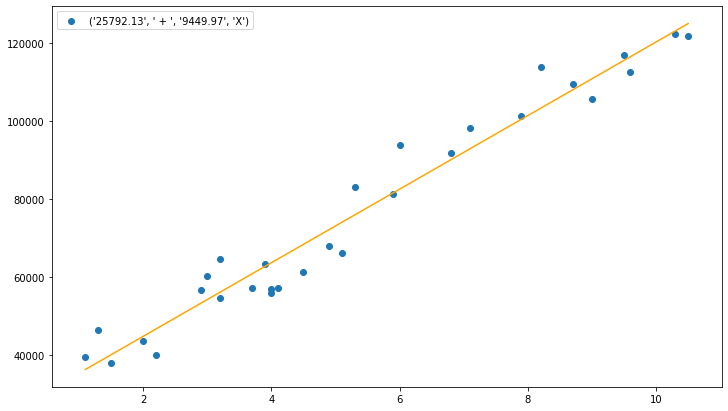

In [8]:
for i in range(2000):
    B0, B1, y_, hiba = gradient_descent_ciklushoz(B0, B1, df['YearsExperience'], df['Salary'], 0.001)

plt.figure(figsize=(12, 7))
plt.plot(df['YearsExperience'], y_, c='orange')
plt.scatter(df['YearsExperience'], df['Salary'], label=('{0:.2f}'.format(B0),' + ','{0:.2f}'.format(B1), 'X'))
plt.legend()
print('B0: ', B0)
print('B1: ', B1)
print('Átlag hiba: ', np.sqrt(hiba)/len(df['YearsExperience']))